In [1]:
# import tensorflow and keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras_tuner.tuners import RandomSearch
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

# importing helper library
import pandas as pd
import numpy as np

In [2]:
import csv
# reading in sample dataset
df=pd.read_csv('kddcup.data_10_percent_corrected.csv', names=('duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations','num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_srv_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_error_rate','connection'))
# df=pd.read_csv('d:\\316Tute\\data\\RealCombine.csv')
df.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_srv_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_error_rate,connection
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.00,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.0,0.0,0.0,0.0,normal.
5,0,tcp,http,SF,217,2032,0,0,0,0,...,59,1.0,0.0,0.02,0.00,0.0,0.0,0.0,0.0,normal.
6,0,tcp,http,SF,212,1940,0,0,0,0,...,69,1.0,0.0,1.00,0.04,0.0,0.0,0.0,0.0,normal.
7,0,tcp,http,SF,159,4087,0,0,0,0,...,79,1.0,0.0,0.09,0.04,0.0,0.0,0.0,0.0,normal.
8,0,tcp,http,SF,210,151,0,0,0,0,...,89,1.0,0.0,0.12,0.04,0.0,0.0,0.0,0.0,normal.
9,0,tcp,http,SF,212,786,0,0,0,1,...,99,1.0,0.0,0.12,0.05,0.0,0.0,0.0,0.0,normal.


In [3]:
#checking for columns with only 1 value
columns = list(df)
for column in columns:
    if len(df[column].unique())==1:
        print(column)

num_outbound_cmds
is_host_login


In [4]:
df = df.drop(['num_outbound_cmds', 'is_host_login'], axis=1)

## Displaying string column counts

<AxesSubplot:>

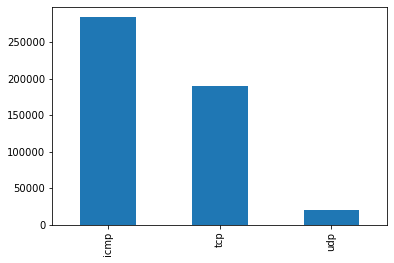

In [5]:
import seaborn as sb
df['protocol_type'].value_counts().plot(kind='bar')

<AxesSubplot:>

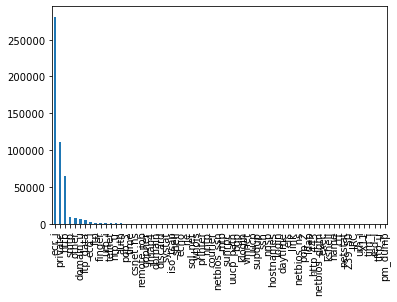

In [6]:
df['service'].value_counts().plot(kind='bar')

<AxesSubplot:>

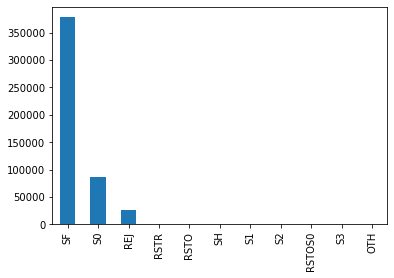

In [7]:
df['flag'].value_counts().plot(kind='bar')

<AxesSubplot:>

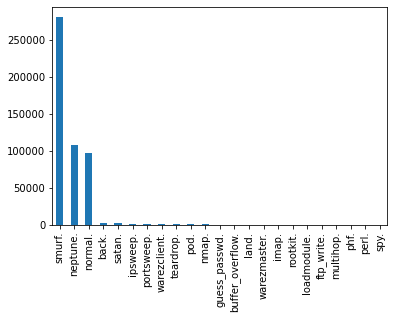

In [8]:
df['connection'].value_counts().plot(kind='bar')

## Changing string data to integer/float

In [9]:
df = df.replace('icmp', 1)
df = df.replace('tcp', 2)
df = df.replace('udp', 3)
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_srv_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_error_rate,connection
0,0,2,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0,normal.
1,0,2,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,normal.
2,0,2,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
3,0,2,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
4,0,2,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,2,http,SF,310,1881,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal.
494017,0,2,http,SF,282,2286,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.
494018,0,2,http,SF,203,1200,0,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal.
494019,0,2,http,SF,291,1200,0,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal.


In [10]:
dfconn = df.connection.value_counts()
dfconnlist = dfconn.keys().tolist()
for i in range(len(dfconnlist)):
    df = df.replace(dfconnlist[i], i+1)
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_srv_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_error_rate,connection
0,0,2,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0,3
1,0,2,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,3
2,0,2,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,3
3,0,2,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,3
4,0,2,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,2,http,SF,310,1881,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,3
494017,0,2,http,SF,282,2286,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,3
494018,0,2,http,SF,203,1200,0,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,3
494019,0,2,http,SF,291,1200,0,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,3


In [11]:
dfservice = df.service.value_counts()
dfservicelist = dfservice.keys().tolist()
for i in range(len(dfservicelist)):
    df = df.replace(dfservicelist[i], i+1)
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_srv_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_error_rate,connection
0,0,2,3,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0,3
1,0,2,3,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,3
2,0,2,3,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,3
3,0,2,3,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,3
4,0,2,3,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,2,3,SF,310,1881,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,3
494017,0,2,3,SF,282,2286,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,3
494018,0,2,3,SF,203,1200,0,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,3
494019,0,2,3,SF,291,1200,0,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,3


In [12]:
dfflag = df.flag.value_counts()
dfflaglist = dfflag.keys().tolist()
for i in range(len(dfflaglist)):
    df = df.replace(dfflaglist[i], i+1)
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_srv_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_error_rate,connection
0,0,2,3,1,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0,3
1,0,2,3,1,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,3
2,0,2,3,1,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,3
3,0,2,3,1,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,3
4,0,2,3,1,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,2,3,1,310,1881,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,3
494017,0,2,3,1,282,2286,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,3
494018,0,2,3,1,203,1200,0,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,3
494019,0,2,3,1,291,1200,0,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,3


In [13]:
# Splitting the dataset into dependent (y) and independent features (X)
X = df.iloc[:,0:39]  # independent features
y = df.iloc[:,39]    # dependent features

In [14]:
X

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_srv_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_error_rate
0,0,2,3,1,181,5450,0,0,0,0,...,9,9,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0
1,0,2,3,1,239,486,0,0,0,0,...,19,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0
2,0,2,3,1,235,1337,0,0,0,0,...,29,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0
3,0,2,3,1,219,1337,0,0,0,0,...,39,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0
4,0,2,3,1,217,2032,0,0,0,0,...,49,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,2,3,1,310,1881,0,0,0,0,...,86,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0
494017,0,2,3,1,282,2286,0,0,0,0,...,6,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0
494018,0,2,3,1,203,1200,0,0,0,0,...,16,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0
494019,0,2,3,1,291,1200,0,0,0,0,...,26,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0


In [15]:
y

0         3
1         3
2         3
3         3
4         3
         ..
494016    3
494017    3
494018    3
494019    3
494020    3
Name: connection, Length: 494021, dtype: int64

In [16]:
XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.33, random_state=50)

print('========== Before stratify ==========')
print(XTrain.value_counts())
print(yTrain.value_counts())
print(XTrain.shape, yTrain.shape)
print(XTest.shape, yTest.shape)

========== Before stratify ==========
duration  protocol_type  service  flag  src_bytes  dst_bytes  land  wrong_fragment  urgent  hot  num_failed_logins  logged_in  num_compromised  root_shell  su_attempted  num_root  num_file_creations  num_shells  num_access_files  is_guest_login  count  srv_count  serror_rate  srv_serror_rate  rerror_rate  srv_rerror_rate  same_srv_rate  diff_srv_rate  srv_diff_host_rate  dst_host_count  dst_host_srv_count  dst_host_same_srv_rate  dst_host_diff_srv_rate  dst_host_same_srv_port_rate  dst_host_srv_diff_host_rate  dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  dst_host_srv_error_rate
0         1              1        1     1032       0          0     0               0       0    0                  0          0                0           0             0         0                   0           0                 0               511    511        0.0          0.0              0.0          0.0              1.0            0.0          

## Building the model

In [17]:
# defining the tuning model
model = tf.keras.Sequential() # Initializing a keras sequential model (Dense and fully connected layers)
#model.add(keras.layers.Dense(16, input_dim=8, activation='relu')) # First hidden layer that contains 12 neurons
model.add(keras.layers.Dense(32, activation='relu')) # First hidden layer that contains 12 neurons
model.add(keras.layers.Dense(64, activation='relu')) # second hidden layer with 8 neurons   
model.add(keras.layers.Dense(1, activation='sigmoid')) # Output layer

In [18]:
# Compile the model
# model.compile(optimizer='adam',
#              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True)
# )
model.compile(
        optimizer=keras.optimizers.Adam(),
        loss='binary_crossentropy',  # classification problem
        metrics=['accuracy']
    )

In [19]:
# running (fitting) the model
model.fit(XTrain, yTrain, epochs=20, batch_size=10)

Epoch 1/20
33100/33100 [==============================] - 18s 526us/step - loss: -353391136.0000 - accuracy: 0.5696
Epoch 2/20
33100/33100 [==============================] - 18s 533us/step - loss: -1677357824.0000 - accuracy: 0.5696
Epoch 3/20
33100/33100 [==============================] - 18s 534us/step - loss: -6346937856.0000 - accuracy: 0.5696
Epoch 4/20
33100/33100 [==============================] - 18s 536us/step - loss: -11707570176.0000 - accuracy: 0.5696
Epoch 5/20
33100/33100 [==============================] - 18s 548us/step - loss: -31769745408.0000 - accuracy: 0.5696
Epoch 6/20
33100/33100 [==============================] - 18s 529us/step - loss: -45984153600.0000 - accuracy: 0.5696
Epoch 7/20
33100/33100 [==============================] - 17s 519us/step - loss: -75814543360.0000 - accuracy: 0.5696
Epoch 8/20
33100/33100 [==============================] - 17s 512us/step - loss: -104010293248.0000 - accuracy: 0.5696
Epoch 9/20
33100/33100 [==============================] - 1

In [20]:
print('========== Evaluation:')
model.evaluate(XTrain, yTrain)

========== Evaluation:
10344/10344 [==============================] - 4s 384us/step - loss: -2065514889216.0000 - accuracy: 0.5696


[-2065514889216.0, 0.5696115493774414]

In [21]:
model.evaluate(XTest, yTest)

5095/5095 [==============================] - 2s 403us/step - loss: -1294541258752.0000 - accuracy: 0.5659


[-1294541258752.0, 0.5658694505691528]

### 20/20 epochs have 56.96 accuracy

## Tuning model

In [22]:
# defining the tuning model
def buildModel(hp):
    model = keras.Sequential()
    for i in range(hp.Int('numLayers', 2, 20)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                              min_value=32,
                                              max_value=512,
                                              step=32),
                               activation='relu'))
        
    #model.add(layers.Dense(1, activation='linear'))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    model.compile(
        optimizer=keras.optimizers.Adam(
            #hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
            hp.Choice('learning_rate', [1e-2, 1e-4])),
            #loss='mean_absolute_error',
            #metrics=['mean_absolute_error']
            loss = 'binary_crossentropy',
            metrics=['accuracy']
    )
    return model

In [34]:
tuner = RandomSearch(
    buildModel,
    # objective = 'val_mean_absolute_error',
    objective = 'val_accuracy',
    max_trials = 5,
    executions_per_trial = 2,
    directory = 'a2t2',
    project_name = 'condition'
)

In [35]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
numLayers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.0001], 'ordered': True}


In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [37]:
X_train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_srv_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_error_rate
482186,1470,3,5,1,147,105,0,0,0,0,...,255,1,0.00,0.82,1.00,0.00,0.0,0.0,0.0,0.0
302290,0,1,1,1,1032,0,0,0,0,0,...,255,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0
9330,0,1,1,1,1032,0,0,0,0,0,...,255,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0
91417,6,2,4,1,2872,335,0,0,0,0,...,188,186,0.67,0.02,0.01,0.01,0.0,0.0,0.0,0.0
293169,0,1,1,1,1032,0,0,0,0,0,...,255,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,0,1,1,1,1032,0,0,0,0,0,...,255,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0
365838,0,2,2,2,0,0,0,0,0,0,...,255,8,0.03,0.06,0.00,0.00,1.0,1.0,0.0,0.0
131932,0,1,1,1,1032,0,0,0,0,0,...,255,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0
146867,9141,3,5,1,147,105,0,0,0,0,...,255,3,0.01,0.41,0.84,0.00,0.0,0.0,0.0,0.0


In [38]:
X_test

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_srv_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_error_rate
317921,0,1,1,1,1032,0,0,0,0,0,...,255,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0
171422,0,1,1,1,1032,0,0,0,0,0,...,255,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0
312181,0,1,1,1,1032,0,0,0,0,0,...,255,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0
87346,0,2,3,1,345,5419,0,0,0,0,...,101,255,1.00,0.00,0.01,0.02,0.0,0.0,0.0,0.0
57449,0,2,2,2,0,0,0,0,0,0,...,255,2,0.01,0.07,0.00,0.00,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351572,0,2,2,2,0,0,0,0,0,0,...,255,19,0.07,0.06,0.00,0.00,1.0,1.0,0.0,0.0
378352,0,2,2,2,0,0,0,0,0,0,...,255,22,0.09,0.05,0.00,0.00,1.0,1.0,0.0,0.0
33349,0,2,3,1,219,2367,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0
119307,0,2,2,2,0,0,0,0,0,0,...,255,14,0.05,0.06,0.00,0.00,1.0,1.0,0.0,0.0


In [39]:
y_train

482186    3
302290    1
9330      1
91417     3
293169    1
         ..
259178    1
365838    2
131932    1
146867    3
121958    2
Name: connection, Length: 330994, dtype: int64

In [40]:
y_test

317921    1
171422    1
312181    1
87346     3
57449     2
         ..
351572    2
378352    2
33349     3
119307    2
332656    1
Name: connection, Length: 163027, dtype: int64

In [42]:
tuner.search(X_train, y_train,
            epochs = 10,
            validation_data = (X_test, y_test))

Trial 5 Complete [00h 14m 48s]
val_accuracy: 0.0

Best val_accuracy So Far: 0.5682923793792725
Total elapsed time: 00h 44m 04s
INFO:tensorflow:Oracle triggered exit


In [43]:
tuner.results_summary()

Results summary
Results in a2t2\condition2
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
numLayers: 3
units_0: 384
units_1: 256
learning_rate: 0.01
units_2: 32
Score: 0.5682923793792725
Trial summary
Hyperparameters:
numLayers: 2
units_0: 416
units_1: 288
learning_rate: 0.01
units_2: 192
Score: 0.5682923793792725
Trial summary
Hyperparameters:
numLayers: 12
units_0: 128
units_1: 96
learning_rate: 0.01
units_2: 352
units_3: 32
units_4: 32
units_5: 32
units_6: 32
units_7: 32
units_8: 32
units_9: 32
units_10: 32
units_11: 32
Score: 0.0
Trial summary
Hyperparameters:
numLayers: 16
units_0: 128
units_1: 448
learning_rate: 0.0001
units_2: 448
units_3: 320
units_4: 448
units_5: 320
units_6: 256
units_7: 352
units_8: 448
units_9: 224
units_10: 128
units_11: 416
units_12: 32
units_13: 32
units_14: 32
units_15: 32
Score: 0.0
Trial summary
Hyperparameters:
numLayers: 13
units_0: 288
units_1: 384
learning_rate: 0.01
units_2: 512
units_3: 256


### Best accuracy is still about 56.8, does not make much difference